In [1]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud

In [8]:
with open('E:/NLP NOTES/NLP CRICKET.txt','r') as f:
    text=f.readlines()       

In [9]:
text=[line.strip()for line in text]

In [10]:
print(text)

['The Game of Cricket', '', 'Batsmen', '', '', '', '', 'Bowler   Wickets Umpire     Crease', 'Cricket field: The rectangular patch in the center is called the pitch.                  Pitch', '', '', '', '', 'A typical Cricket game has 11 players in each team. It is fundamentally very similar', 'to baseball. It is played with a bat and a ball. The center of the field is a rectangular area of', '22 meters called a pitch. In cricket there are only two bases (called creases) on either ends', 'of the pitch. Three wooden sticks called wickets or stumps are placed inside each crease.', 'A batsman stands on the pitch in front of the wickets in one crease, and tries to hit the ball', 'that a bowler (pitcher) throws towards him. His partner stands in the other crease waiting', 'for his turn. Aim of the batsman is to hit the ball to make as many runs (points) as he can,', 'while the aim of the bowler is to get the batsman out while giving away the least runs', 'possible.', '', 'There are several 

In [ ]:
# let us have a vector of words 

In [11]:
# lets start again 
with open('E:/NLP NOTES/NLP CRICKET.txt','r') as f:
    chunk_2=f.readlines()

In [12]:
chunk_2=[line.strip()for line in text]

In [13]:
print(chunk_2)

['The Game of Cricket', '', 'Batsmen', '', '', '', '', 'Bowler   Wickets Umpire     Crease', 'Cricket field: The rectangular patch in the center is called the pitch.                  Pitch', '', '', '', '', 'A typical Cricket game has 11 players in each team. It is fundamentally very similar', 'to baseball. It is played with a bat and a ball. The center of the field is a rectangular area of', '22 meters called a pitch. In cricket there are only two bases (called creases) on either ends', 'of the pitch. Three wooden sticks called wickets or stumps are placed inside each crease.', 'A batsman stands on the pitch in front of the wickets in one crease, and tries to hit the ball', 'that a bowler (pitcher) throws towards him. His partner stands in the other crease waiting', 'for his turn. Aim of the batsman is to hit the ball to make as many runs (points) as he can,', 'while the aim of the bowler is to get the batsman out while giving away the least runs', 'possible.', '', 'There are several 

# joining effect

In [14]:
chunk_pasted_2=' '.join(chunk_2)

In [15]:
chunk_pasted_2

'The Game of Cricket  Batsmen     Bowler   Wickets Umpire     Crease Cricket field: The rectangular patch in the center is called the pitch.                  Pitch     A typical Cricket game has 11 players in each team. It is fundamentally very similar to baseball. It is played with a bat and a ball. The center of the field is a rectangular area of 22 meters called a pitch. In cricket there are only two bases (called creases) on either ends of the pitch. Three wooden sticks called wickets or stumps are placed inside each crease. A batsman stands on the pitch in front of the wickets in one crease, and tries to hit the ball that a bowler (pitcher) throws towards him. His partner stands in the other crease waiting for his turn. Aim of the batsman is to hit the ball to make as many runs (points) as he can, while the aim of the bowler is to get the batsman out while giving away the least runs possible.  There are several types of cricket games, but we would talk about one-day game in this d

# lower case

In [16]:
clean_data1=chunk_pasted_2.lower()

In [17]:
clean_data1

'the game of cricket  batsmen     bowler   wickets umpire     crease cricket field: the rectangular patch in the center is called the pitch.                  pitch     a typical cricket game has 11 players in each team. it is fundamentally very similar to baseball. it is played with a bat and a ball. the center of the field is a rectangular area of 22 meters called a pitch. in cricket there are only two bases (called creases) on either ends of the pitch. three wooden sticks called wickets or stumps are placed inside each crease. a batsman stands on the pitch in front of the wickets in one crease, and tries to hit the ball that a bowler (pitcher) throws towards him. his partner stands in the other crease waiting for his turn. aim of the batsman is to hit the ball to make as many runs (points) as he can, while the aim of the bowler is to get the batsman out while giving away the least runs possible.  there are several types of cricket games, but we would talk about one-day game in this d

# punctuations


In [18]:
clean_data2=re.sub(r'[^\w\s]','',clean_data1)

In [19]:
clean_data2

'the game of cricket  batsmen     bowler   wickets umpire     crease cricket field the rectangular patch in the center is called the pitch                  pitch     a typical cricket game has 11 players in each team it is fundamentally very similar to baseball it is played with a bat and a ball the center of the field is a rectangular area of 22 meters called a pitch in cricket there are only two bases called creases on either ends of the pitch three wooden sticks called wickets or stumps are placed inside each crease a batsman stands on the pitch in front of the wickets in one crease and tries to hit the ball that a bowler pitcher throws towards him his partner stands in the other crease waiting for his turn aim of the batsman is to hit the ball to make as many runs points as he can while the aim of the bowler is to get the batsman out while giving away the least runs possible  there are several types of cricket games but we would talk about oneday game in this discussion it is aroun

# DIGITS

In [20]:
clean_data3=re.sub(r'\d+',' ',clean_data2)

In [21]:
clean_data3

'the game of cricket  batsmen     bowler   wickets umpire     crease cricket field the rectangular patch in the center is called the pitch                  pitch     a typical cricket game has   players in each team it is fundamentally very similar to baseball it is played with a bat and a ball the center of the field is a rectangular area of   meters called a pitch in cricket there are only two bases called creases on either ends of the pitch three wooden sticks called wickets or stumps are placed inside each crease a batsman stands on the pitch in front of the wickets in one crease and tries to hit the ball that a bowler pitcher throws towards him his partner stands in the other crease waiting for his turn aim of the batsman is to hit the ball to make as many runs points as he can while the aim of the bowler is to get the batsman out while giving away the least runs possible  there are several types of cricket games but we would talk about oneday game in this discussion it is around 

# stop words

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words=set(stopwords.words('english'))

In [24]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
tokens=word_tokenize(clean_data3)

In [29]:
clean_data4=[i for i in tokens if not i in stop_words]

In [30]:
clean_data4

['game',
 'cricket',
 'batsmen',
 'bowler',
 'wickets',
 'umpire',
 'crease',
 'cricket',
 'field',
 'rectangular',
 'patch',
 'center',
 'called',
 'pitch',
 'pitch',
 'typical',
 'cricket',
 'game',
 'players',
 'team',
 'fundamentally',
 'similar',
 'baseball',
 'played',
 'bat',
 'ball',
 'center',
 'field',
 'rectangular',
 'area',
 'meters',
 'called',
 'pitch',
 'cricket',
 'two',
 'bases',
 'called',
 'creases',
 'either',
 'ends',
 'pitch',
 'three',
 'wooden',
 'sticks',
 'called',
 'wickets',
 'stumps',
 'placed',
 'inside',
 'crease',
 'batsman',
 'stands',
 'pitch',
 'front',
 'wickets',
 'one',
 'crease',
 'tries',
 'hit',
 'ball',
 'bowler',
 'pitcher',
 'throws',
 'towards',
 'partner',
 'stands',
 'crease',
 'waiting',
 'turn',
 'aim',
 'batsman',
 'hit',
 'ball',
 'make',
 'many',
 'runs',
 'points',
 'aim',
 'bowler',
 'get',
 'batsman',
 'giving',
 'away',
 'least',
 'runs',
 'possible',
 'several',
 'types',
 'cricket',
 'games',
 'would',
 'talk',
 'oneday',
 'gam

In [31]:
# lets club the list
clean_data4=" ".join(str(x)for x in clean_data4)

In [32]:
clean_data4

'game cricket batsmen bowler wickets umpire crease cricket field rectangular patch center called pitch pitch typical cricket game players team fundamentally similar baseball played bat ball center field rectangular area meters called pitch cricket two bases called creases either ends pitch three wooden sticks called wickets stumps placed inside crease batsman stands pitch front wickets one crease tries hit ball bowler pitcher throws towards partner stands crease waiting turn aim batsman hit ball make many runs points aim bowler get batsman giving away least runs possible several types cricket games would talk oneday game discussion around hour long game two sessions team bats first tries put high score team batting second beat score win game team overs balls make ie balls delivered score players team bat either run balls score bowler bowl time overs whole game typical game players bowl two batsmen field times bowling team players occupy rest field stop ball order keep batting team scor

In [ ]:
# let us remove single letters 

In [33]:
clean_data5=' '.join( i for i in clean_data4.split() if not(i.isalpha() and len(i)==1))

In [34]:
clean_data5

'game cricket batsmen bowler wickets umpire crease cricket field rectangular patch center called pitch pitch typical cricket game players team fundamentally similar baseball played bat ball center field rectangular area meters called pitch cricket two bases called creases either ends pitch three wooden sticks called wickets stumps placed inside crease batsman stands pitch front wickets one crease tries hit ball bowler pitcher throws towards partner stands crease waiting turn aim batsman hit ball make many runs points aim bowler get batsman giving away least runs possible several types cricket games would talk oneday game discussion around hour long game two sessions team bats first tries put high score team batting second beat score win game team overs balls make ie balls delivered score players team bat either run balls score bowler bowl time overs whole game typical game players bowl two batsmen field times bowling team players occupy rest field stop ball order keep batting team scor

# whitespace

In [35]:
clean_data6= clean_data5.strip()

In [36]:
clean_data6

'game cricket batsmen bowler wickets umpire crease cricket field rectangular patch center called pitch pitch typical cricket game players team fundamentally similar baseball played bat ball center field rectangular area meters called pitch cricket two bases called creases either ends pitch three wooden sticks called wickets stumps placed inside crease batsman stands pitch front wickets one crease tries hit ball bowler pitcher throws towards partner stands crease waiting turn aim batsman hit ball make many runs points aim bowler get batsman giving away least runs possible several types cricket games would talk oneday game discussion around hour long game two sessions team bats first tries put high score team batting second beat score win game team overs balls make ie balls delivered score players team bat either run balls score bowler bowl time overs whole game typical game players bowl two batsmen field times bowling team players occupy rest field stop ball order keep batting team scor

In [ ]:
# frequency of the words 

In [37]:
words_dict={}


In [38]:
for word in clean_data6.split():
    words_dict[word]= words_dict.get(word,0)+1
for key in sorted(words_dict):
    print("{}:{}".format(key,words_dict[key]))

added:2
aim:2
air:1
also:1
area:1
around:1
away:1
ball:15
balls:3
baseball:1
bases:1
bat:5
bats:1
batsman:11
batsmanâs:1
batsmen:5
batting:4
beat:1
bold:1
bounce:2
boundary:1
bowl:4
bowler:7
bowling:1
called:7
catches:1
caught:1
center:2
club:2
common:2
complete:1
contact:1
counts:1
crease:8
creases:1
cricket:7
cricketstevenstechedu:1
crosses:1
delivered:3
delivers:1
discussion:1
either:2
ends:1
fails:1
fall:1
field:5
fielder:3
first:1
foot:1
front:1
fundamentally:1
game:7
games:1
get:3
gets:1
giving:1
go:1
ground:2
high:1
hit:5
hits:5
hitting:1
hour:1
httpattilastevenstecheducricket:1
httpnewsbbccouksportacademyhisacricketdefaultstm:2
ie:1
information:1
inside:4
keep:1
khurshid:1
land:3
lbw:1
least:2
leg:3
long:2
make:2
many:1
meters:1
misses:1
multiple:2
need:1
noball:2
obstructed:1
occupy:1
one:2
oneday:1
order:1
overs:2
partner:1
patch:1
pitch:5
pitcher:1
placed:1
played:1
players:4
points:1
possible:1
president:1
put:1
rectangular:2
reference:1
rest:1
run:6
running:2
runout:1
runs

# wordcloud

In [39]:
# create the word cloud object
wordcloud= WordCloud(width=480,height=480,margin=0).generate(clean_data6)

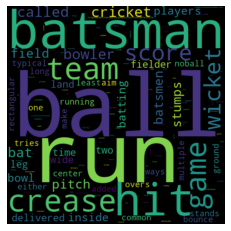

In [40]:
# display the generated image 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()


In [41]:
# controlling number of words
wordcloud= WordCloud(width=480,height=480,max_words=3).generate(clean_data6)

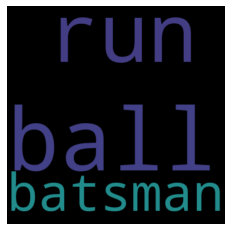

In [42]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()


In [43]:
wordcloud= WordCloud(width=480,height=480,colormap="Oranges_r").generate(clean_data6)

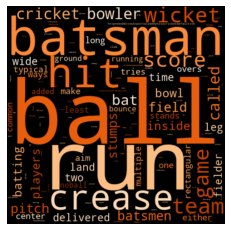

In [44]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()


# SENTIMENT ANALYSIS

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
import nltk

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
analyser=SentimentIntensityAnalyzer()

In [49]:
scores=analyser.polarity_scores(clean_data6)

In [50]:
for key in sorted(scores):
    print('{0}:{1}, '.format(key, scores[key]), end='')

compound:0.6486, neg:0.021, neu:0.944, pos:0.034, 